In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

The purpose of this file is too visualize the input and output from PSDDF. The visualizations will be used to compare the results from PEST and PSDDF. Input and Output directories correspond to the directories need to run the PSDDF model (Input) and the resulting files from the run (Output). Currently the Input and Result folder can only contain one from the PSDDF but there are plans to added multi-model capacilities.


# Notes

For some of the example files the original files had a space before the file extension. This was causing an error in the code. My local Exmaple file names have been updated. Future files created in PSDDF should be created without a space before the extension if this code is to be used.


In [135]:
### Functions

def get_files_in_folder(folder_path):
    file_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # file_list.append(os.path.join(root, file.replace(" ", "").strip()))
            file_list.append(os.path.join(root, file))

    return file_list

# def get_files_in_folder(folder_path):
#     files = []
#     for file_name in os.listdir(folder_path):
#         if os.path.isfile(os.path.join(folder_path, file_name)):
#             files.append(file_name.replace(" ", "").rstrip())
#     return files

def find_string(array, substring):
    for string in array:
        if substring in string:
            return string
    return None

def find_strings_containing(strings, targets):
    result = []
    for string in strings:
        if all(target in string for target in targets):
            result.append(string)
    return result

# Put the file read to df lines into a function

In [140]:
# Dir to folder containing input files
Input_Dir = r"C:\Users\u4hncjjm\Documents\PSDDF"

# Dir to folder containing output files
Output_Dir = r"C:\Users\u4hncjjm\Documents\PSDDF\Res"

# Input file name (This is case sensitive)
Input_FileName = "EXAMPLE1"

# Output file name
Output_FileName = "Example1_Res"

# Collect array of files in folders
Input_files = get_files_in_folder(Input_Dir)
Output_Dir = get_files_in_folder(Output_Dir)

print(Input_files)

['C:\\Users\\u4hncjjm\\Documents\\PSDDF\\addamse.tmp', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EVAPRECI.DAT', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EXAMPLE1.psi', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EXAMPLE1R.psi', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EXAMPLE2.psi', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EXAMPLE3.psi', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EXAMPLE4O.psi', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EXAMPLE4U.psi', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\EXAMPLE5.psi', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\FDESICAT.DAT', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\HELVB.FON', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\MAPROPER.DAT', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\PCGRAPH.EXE', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\PSDDF.exe', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\Run_PSDDF_Example_2.ipynb', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\Old version of INPSDDF\\INPSDDF.EXE', 'C:\\Users\\u4hncjjm\\Documents\\PSDDF\\Res\\Example1_Res.pgc', 'C:\\Users\\u4hncjjm\\Do

In [141]:
#Maybe change this to something that reads in the possible values from the folder for all tests

### PSI File
Input parameters

In [143]:
# Parse folder files to find PSI and select 
PSI_FileDir = find_strings_containing(Input_files, [Input_FileName + ".psi"])[0]

# Print the Dir of the PSI file
print("Selected PSI File: {}".format(PSI_FileDir))

# Read the CSV file as a list of lines
with open(PSI_FileDir, "r") as file:
    lines = file.readlines()

# Parse the lines using regex to split on any amount of whitespace
data = []
for line in lines:
    values = re.split(r"\s+", line.strip())
    data.append(values)

# Assign split data to dataframe
PSI_df = pd.DataFrame(data)

# Display the DataFrame
display(PSI_df)

Selected PSI File: C:\Users\u4hncjjm\Documents\PSDDF\EXAMPLE1.psi


,0,1,2,3,4,5,6,7,8,9
0,100,'Underwater,Dredged,Material,Placement',1,2,None,None,None
1,101,1,2,1,None,None,None,None,None,None
2,102,0.57,1E-02,26,-15,0,62.4,4.5,None,None
3,103,0,0,1,None,None,None,None,None,None
4,104,1,2.60,.04,.145,3.10,6.70,.83,.49,36
...,...,...,...,...,...,...,...,...,...,...
66,166,0.41,0.43,None,None,None,None,None,None,None
67,167,0.33,0.25,None,None,None,None,None,None,None
68,168,0.21,0.18,None,None,None,None,None,None,None
69,169,0.16,0.26,None,None,None,None,None,None,None


PSI files are group into alphabetical sections by the PSDDF manual. The convention used here follows from page 59 of the PSDDF Manual. 

The purpose of this delimitting is to allow users to have a label for each input and to facilitate plotting once PEST is active.

Several of the file structures use the last element of some rows to assign the length of the next section. These length values are stored in the Num_"section" variables.

Simulation Description,???? Secondary Compression Flag ????, Continuation File flag


,0,1,2,3,4,5,6,7,8,9
0,100,'Underwater,Dredged,Material,Placement',1,2,None,None,None


,line #,Print Flag,Cap Model Flag (Recovery Flag),"Dimension Flag (1:English, 2:SI)"
1,101.0,1.0,2.0,1.0


,Line #,Incompr Fondn VoidRatio,Incompr Fondn Perm,Vert Drain Len,Fondn Elev,Wtr Elev,Unit Weight,Secondary Compres TOL
2,102.0,0.57,0.01,26.0,-15.0,0.0,62.4,4.5


,line #,Mat ID,Specific Gravity,Ca/Cc,Cr/Cc,Desication Limit,Saturation Limit,Max. Crust Depth,Saturation at DL,Len Void Relation
4,104.0,1.0,2.6,0.04,0.145,3.1,6.7,0.83,0.49,36.0


,line #,Void Ratio,Effective Stress,Permeability
5,105.0,12.15,0.00,0.156000
6,106.0,12.00,0.06,0.144000
7,107.0,11.50,0.17,0.112000
8,108.0,11.00,0.36,0.087100
9,109.0,10.50,0.66,0.067700
10,110.0,10.00,1.12,0.052700
11,111.0,9.70,1.50,0.045800
12,112.0,9.30,2.20,0.037400
13,113.0,9.00,2.86,0.032300
14,114.0,8.70,3.68,0.027600


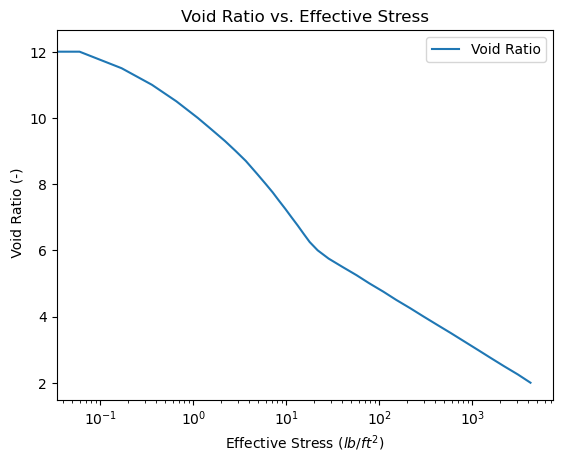

,line #,Print Times (days),Init Thick Added,Time until Desicat,Desicat Month,Print Flag,Fill e0,Mat ID,Num Sub Layers
42,142.0,-,5.25,10000.0,6.0,3.0,12.15,1.0,9.0
43,143.0,120.0,0.00,10000.0,6.0,3.0,-,-,-
44,144.0,240.0,0.00,10000.0,6.0,3.0,-,-,-
45,145.0,365.0,5.25,10000.0,6.0,3.0,12.15,1.0,9.0
46,146.0,485.0,0.00,10000.0,6.0,3.0,-,-,-
47,147.0,605.0,0.00,10000.0,6.0,3.0,-,-,-
48,148.0,730.0,5.25,10000.0,6.0,3.0,12.15,1.0,9.0
49,149.0,850.0,0.00,10000.0,6.0,3.0,-,-,-
50,150.0,970.0,0.00,10000.0,6.0,3.0,-,-,-
51,151.0,1095.0,5.25,10000.0,6.0,3.0,12.15,1.0,9.0


,line #,Num Time per month,Drainage Efficiency Factor,Fill Evap Efficiency
57,157,30,1,0.75


,line #,Max Potential Evap,Avg monthly Rainfall
58,158,0.18,0.24
59,159,0.23,0.27
60,160,0.36,0.40
61,161,0.36,0.25
62,162,0.57,0.32
63,163,0.49,0.53
64,164,0.67,0.68
65,165,0.57,0.54
66,166,0.41,0.43
67,167,0.33,0.25


In [13]:
### Select Group A data and change to type float
GroupA_df = PSI_df.loc[[0]].copy() # Problem Description

# Display Group A header tags
print("Simulation Description,???? Secondary Compression Flag ????, Continuation File flag")
# Display Group A data
display(GroupA_df)

### Select Group B data and change to type float
GroupB_df = PSI_df.loc[[1], 0:3].copy().astype(float)

# Assign column headers to Group B data
GroupB_df.columns = ["line #", "Print Flag", "Cap Model Flag (Recovery Flag)", "Dimension Flag (1:English, 2:SI)"]

# Display Group B data
display(GroupB_df)

### Select Group E data and change to type float
GroupE_df = PSI_df.loc[[2], 0:7].copy().astype(float) # Incompressible Foundation Material Properties

# Assign column headers to Group E data
GroupE_df.columns = ["Line #", "Incompr Fondn VoidRatio", "Incompr Fondn Perm", "Vert Drain Len",  
                     "Fondn Elev", "Wtr Elev", "Unit Weight","Secondary Compres TOL"]

# Display Group E data
display(GroupE_df)

### Select Group C data and change to type float
GroupC_pt1_df = PSI_df.loc[[4]].copy().astype(float)

### Group C is split into two sections
#   GroupC_pt1: Material Params and void relationship ratios
#   GroupC_pt2: Relationship between void ratio, effective stress and permeability

# Assign column headers to Group C_pt1
GroupC_pt1_df.columns = ["line #", "Mat ID", "Specific Gravity", "Ca/Cc", "Cr/Cc", "Desication Limit", 
                         "Saturation Limit", "Max. Crust Depth", "Saturation at DL", "Len Void Relation"]

# Retrieve length of void, effective stress, permeability relationship   
Num_VoidRelation = int(GroupC_pt1_df.iloc[0,-1]) # User specified

# Display Group C_pt1 data
display(GroupC_pt1_df)

# Beginning Row of the Void Relation
begin_VoidRelation = 5 # For material 1 void relation begins on row 5

# End Row of the Void Relation
end_VoidRelation = begin_VoidRelation + Num_VoidRelation

### Select Group C_pt2 and change to type float
GroupC_pt2_df = PSI_df.iloc[begin_VoidRelation:end_VoidRelation,0:4].copy().astype(float)

# Assign column headers to Group C_pt2
GroupC_pt2_df.columns = ["line #", "Void Ratio", "Effective Stress", "Permeability"]

# Display Group C_pt2 data
display(GroupC_pt2_df)

# Plot Group C_pt2 Void ratio vs. Effective stress
GroupC_pt2_df.plot(x = "Effective Stress", y = "Void Ratio", logx = True, ylabel= " Void Ratio (-)",
                    xlabel= "Effective Stress ($lb/ft^2$)")
plt.title("Void Ratio vs. Effective Stress")
plt.show()

# Retrieve length of Print Times (Group G) from Void Relation section
Num_PrintTimes = int(PSI_df.iloc[end_VoidRelation, 1]) # df selection Assumes 1 material, needs to be updated

#### Possible solution: Update the begginning and end of the void relation after reading each relation in using a for loop

# Begin Print times on row after last Void Relation
begin_PrintTimes = end_VoidRelation + 1

# Calc end of Print times data table
end_PrintTimes = begin_PrintTimes + Num_PrintTimes

### Select Group G data and change to type float
GroupG_df = PSI_df.iloc[begin_PrintTimes:end_PrintTimes, 0:-1].astype(float)

# Assign column headers to Group G
GroupG_df.columns = ["line #", "Print Times (days)", "Init Thick Added", "Time until Desicat", "Desicat Month", "Print Flag", 
                     "Fill e0", "Mat ID", "Num Sub Layers"]

"""During the read in process the initial print time is left blank in the txt file causing some of the 
first row to be shifted to the left. This needs to be corrected"""

# Select subset of GroupG  first row 
subset = GroupG_df.iloc[0,1:]

# Shift the subset one to the right
subset_shifted = subset.shift(1)

# Complete shifting by assigning shifted data back to df
GroupG_df.iloc[0, 1:] = subset_shifted

# Replace NaN values with "-" to make reading easier
GroupG_df = GroupG_df.fillna('-')

# Display Group G data
display(GroupG_df)

# Group I row for .loc function
RowI = end_PrintTimes

### Select Group I data and change to type float
GroupI_df = PSI_df.loc[[end_PrintTimes], :3].copy()#.astype(float)

# Assign column headers to Group I
GroupI_df.columns = ["line #", "Num Time per month", "Drainage Efficiency Factor", "Fill Evap Efficiency"]

# Display Group I data
display(GroupI_df)

# Begin Evap on row after Group I row
begin_EvapData = RowI + 1

### Select Group H data and change to type float
GroupH_df = PSI_df.loc[begin_EvapData:, :2]#.astype(float)

# Assign column headers to Group H
GroupH_df.columns = ["line #", "Max Potential Evap", "Avg monthly Rainfall"]

# Display Group G data
display(GroupH_df)

### PGC File
Record of Compressible foundation results

In [14]:
PGC_FileDir = find_string(Output_files, ".pgc")
print(PGC_FileDir)
PGC_df = pd.read_csv(PGC_FileDir)
display(PGC_df)

C:\Users\u4hncjjm\Documents\PSDDF\Res\Example1_Res.pgc


,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


### PGD File
Dredged Material Results

In [27]:
PGD_FileDir = find_string(Output_files, ".pgd")
print(PGD_FileDir)

# Read the CSV file as a list of lines
with open(PGD_FileDir, "r") as file:
    lines = file.readlines()

# Parse the lines using regex to split on any amount of whitespace
data = []
for line in lines:
    values = re.split(r"\s+", line.strip())
    data.append(values)

# Create a DataFrame from the parsed data
PGD_df = pd.DataFrame(data).astype(float)

# Print the DataFrame
display(PGD_df)

C:\Users\u4hncjjm\Documents\PSDDF\Res\Example1_Res.pgd


,0,1,2,3
0,10.000000,NaN,NaN,NaN
1,0.000000,NaN,NaN,NaN
2,0.000000,39.860076,0.000000e+00,12.150000
3,0.044360,35.431179,0.000000e+00,12.150000
4,0.088720,31.002281,0.000000e+00,12.150000
...,...,...,...,...
435,1.818758,12.004473,5.711117e+00,8.086548
436,1.863118,8.548113,4.738579e+00,8.352925
437,1.907478,5.251766,3.606029e+00,8.727063
438,1.951838,2.408010,2.020887e+00,9.402350


In [96]:
# Get shape of PGD df for later indexing
PGD_NumRows, PGD_NumCol = PGD_df.shape

# Initialize an index to keep track of the current row
rowIndex = 0

"""A  dataframe needs to be initialized to store the PGD data in a new format. To get the required number of rows
the number of print times need to be known. The number of print times correspond to adding two rows for each time.
The first row is the number of soil layres in that print time and the second is the print time itself."""

# Get number of print times from GroupG df -> GroupG_numRows
GroupG_numRows, GroupG_numCols = GroupG_df.shape

# Caluclate the number of rows in the new df
PGD_Reformat_NumRows = PGD_NumRows - GroupG_numRows * 2

# Calculate the number of columns in the new df (add one for time and one for soil layers)
PGD_Reformat_NumCols =PGD_NumCol + 2

# Initialize a dataframe to store the data in the new format
PGD_Reformat_df = pd.DataFrame(index = range(PGD_Reformat_NumRows), columns = range(PGD_Reformat_NumCols))

# Assign header names
PGD_Reformat_df.columns = ["Num Soil Layer", "Print Time", "Height of Solids", 
                                          "Excess Pore Press", "Effective Stress", "Void Ratio"]

# Initiliaze a RowIndex for the reformatted array
Reformat_RowIndex = 0

### Loop though the length of the file and collect all of the data
while rowIndex < PGD_NumRows:
    
    # Collect specified number of soil layers
    Num_SoilLayers = int(PGD_df.iloc[rowIndex, 0])

    # Collect print time
    time = PGD_df.iloc[rowIndex + 1, 0]

    # Initialize a dummy vectors to allow storing time and NumSoil Layers in new df
    dummy_vector_1 = np.full(Num_SoilLayers, np.nan)
    dummy_vector_2 = np.ones(Num_SoilLayers)
    
    # Store time and Num_SoilLayers to first element of array
    dummy_vector_1[0] = Num_SoilLayers

    # Update rowIndex to the start of the soil data
    rowIndex = rowIndex + 2

    # Collect soil data
    PGD_SoilData = PGD_df.iloc[rowIndex:rowIndex + Num_SoilLayers, :]
    
    # Store data in new df
    PGD_Reformat_df.iloc[Reformat_RowIndex:Reformat_RowIndex + Num_SoilLayers, 0] = dummy_vector_1 # Store Num_SoilLayers
    PGD_Reformat_df.iloc[Reformat_RowIndex:Reformat_RowIndex + Num_SoilLayers, 1] = dummy_vector_2 * time # Store time
    PGD_Reformat_df.iloc[Reformat_RowIndex:Reformat_RowIndex + Num_SoilLayers, 2:] = PGD_SoilData

    # Update row Index
    rowIndex = rowIndex + Num_SoilLayers
    Reformat_RowIndex = Reformat_RowIndex + Num_SoilLayers

# Replace Nan values in the reformated df with '-'
PGD_Reformat_df = PGD_Reformat_df.fillna('-')
display(PGD_Reformat_df.iloc[0:20, :])


,Num Soil Layer,Print Time,Height of Solids,Excess Pore Press,Effective Stress,Void Ratio
0,10.0,0.00000,0.00000,3.986008e+01,0.000000e+00,12.150000
1,-,0.00000,0.04436,3.543118e+01,0.000000e+00,12.150000
2,-,0.00000,0.08872,3.100228e+01,0.000000e+00,12.150000
3,-,0.00000,0.13308,2.657338e+01,0.000000e+00,12.150000
4,-,0.00000,0.17744,2.214449e+01,0.000000e+00,12.150000
5,-,0.00000,0.22180,1.771559e+01,0.000000e+00,12.150000
6,-,0.00000,0.26616,1.328669e+01,0.000000e+00,12.150000
7,-,0.00000,0.31052,8.857795e+00,0.000000e+00,12.150000
8,-,0.00000,0.35488,4.428897e+00,0.000000e+00,12.150000
9,-,0.00000,0.39924,-5.542233e-15,0.000000e+00,12.150000


### PSC File
Used when model continuation is selected.  It is a binary file. <br>
----Not Openable in a text editor----

### PSO File
Record of material properties and outputs

In [27]:
PSO_FileDir = find_string(Output_files, ".pso")
print(PSO_FileDir)

# Read the CSV file as a list of lines
with open(PSO_FileDir, "r") as file:
    lines = file.readlines()

# Parse the lines using regex to split on any amount of whitespace
data = []
for line in lines:
    values = re.split(r"\s+", line.strip())
    data.append(values)

# Create a DataFrame from the parsed data
PSO_df = pd.DataFrame(data)

# Print the DataFrame
display(PSO_df)

C:\Users\u4hncjjm\Documents\PSDDF\Res\Example1_Res.pso


,0,1,2,3,4,5,6,7,8,9
0,,None,None,None,None,None,None,None,None,None
1,,None,None,None,None,None,None,None,None,None
2,,None,None,None,None,None,None,None,None,None
3,,None,None,None,None,None,None,None,None,None
4,,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
415,Settlement,caused,by,Primary,Consolidation,at,time,1701.,=,12.214
416,,None,None,None,None,None,None,None,None,None
417,Settlement,caused,by,Secondary,Compression,at,time,1701.,=,0.000
418,,None,None,None,None,None,None,None,None,None


### PSP File
Record of Time and Surface elevation

C:\Users\u4hncjjm\Documents\PSDDF\Res\Example1_Res.psp


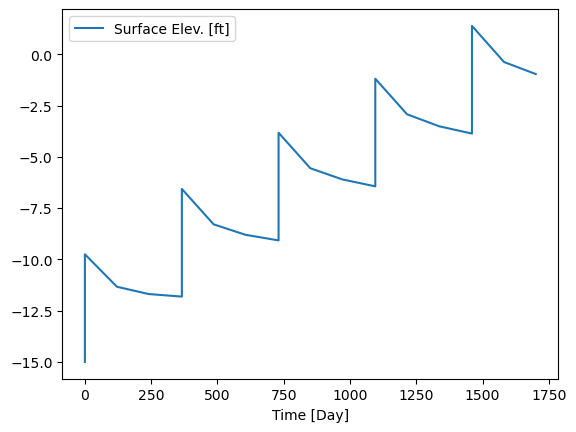

In [22]:
PSP_FileDir = find_string(Output_files, ".psp")
print(PSP_FileDir)
PSP_df = pd.read_csv(PSP_FileDir, header=None, delim_whitespace=True)
PSP_df.columns = ["Time [Day]", "Surface Elev. [ft]"]
# display(PSP_df)
PSP_df.plot(x = "Time [Day]", y = "Surface Elev. [ft]", kind = "line")
plt.show()

### RCY File
Output file for CAP model